## Decision Tree Machine Learning in Python KGP Talkie 

##### For detailed theory read A Introduction to Statistical Learning 
http://faculty.marshall.usc.edu/gareth-james/ISL/

A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

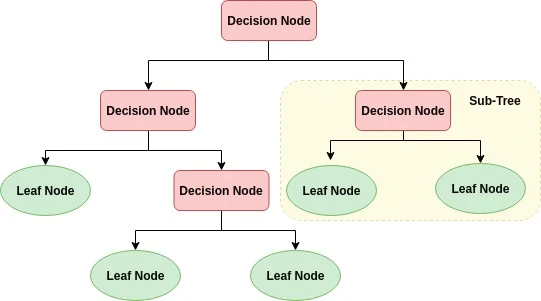

### Example 

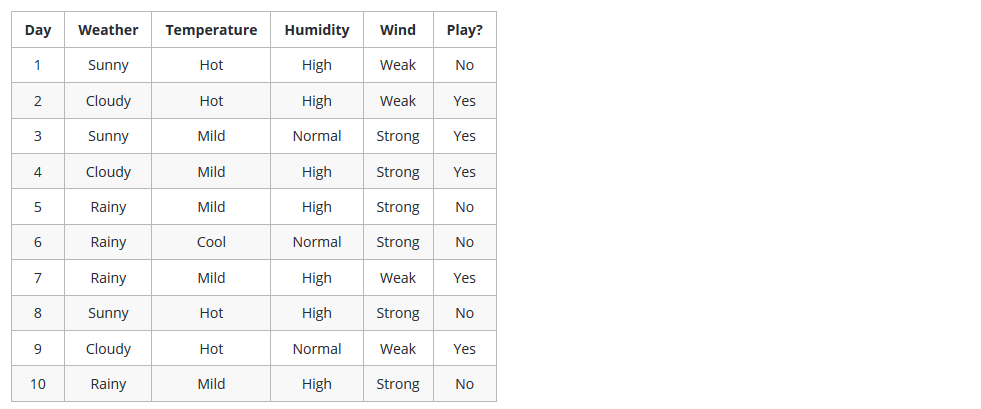

## Why Decision Tree

- Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations.
- Decision trees actually make you see the logic for the data to interpret(not like black box algorithms like SVM,NN,etc..)

## How Decision Tree Works

- Select the best attribute using Attribute Selection Measures(ASM) to split the records.
- Make that attribute a decision node and breaks the dataset into smaller subsets.
- Starts tree building by repeating this process recursively for each child until one of the condition will match:
    - All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.


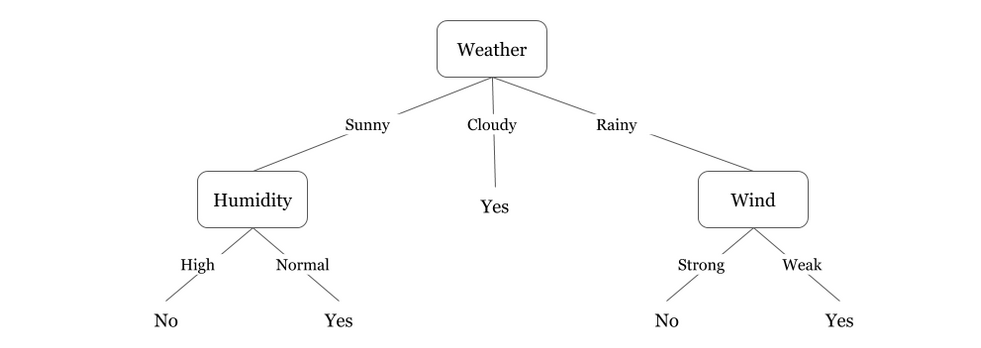

here couple of algorithms to build a decision tree , we only talk about a few which are

    CART (Classification and Regression Trees) → uses Gini Index(Classification) as metric.
    ID3 (Iterative Dichotomiser 3) → uses Entropy function and Information gain as metrics.

## Decision Making in DT with Attribute Selection Measures(ASM)

- Information Gain
- Gain Ratio
- Gini Index

Read Chapter 8: http://faculty.marshall.usc.edu/gareth-james/ISL/

### Information Gain

In order to define information gain precisely, we begin by defining a measure commonly used in information theory, called entropy that characterizes the (im)purity of an arbitrary collection of examples.”

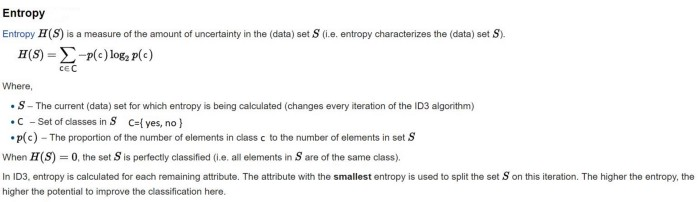

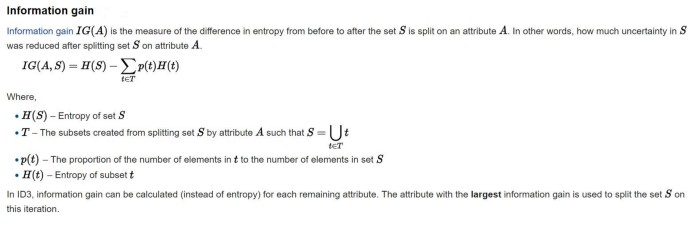

- 1.compute the entropy for data-set
- 2.for every feature:
    - 1.calculate entropy for all categorical values
    - 2.take average information entropy for the current attribute
    - 3.calculate gain for the current attribute3. pick the highest gain attribute.
- 4. Repeat until we get the tree we desired.

### Gain Ratio 

An alternative measure to information gain is gain ratio (Quinlan 1986). Gain ratio tries to the correct the information gain’s bias towards attributes with many possible values by adding a denominator to information gain called split information. Split Information tries to measure how broadly and uniformly the attribute splits the data:

$SplitInformation(S, A) = - \sum_{i=1}^{c}rac{|S_i|}{|S|} \cdot log_2 rac{|S_i|}{|S|}$

The Gain Ratio is defined in terms of Gain and SplitInformation as,

$Gain Ratio(S, A) \equiv rac{Gain(S, A)}{SplitInformation(S, A)}$

### Gini Index 

Gini Index is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.

If our dataset is Pure then likelihood of incorrect classification is 0. If our sample is mixture of different classes then likelihood of incorrect classification will be high.

## Optimizing DT 



    criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

    splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

    max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).


### Recursive Binary Splitting 

In this procedure all the features are considered and different split points are tried and tested using a cost function. The split with the best cost (or lowest cost) is selected.

### When to stop splitting?

You might ask when to stop growing a tree? As a problem usually has a large set of features, it results in large number of split, which in turn gives a huge tree. Such trees are complex and can lead to overfitting. So, we need to know when to stop? 

set max_depth

### Pruning 

The performance of a tree can be further increased by pruning. It involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.

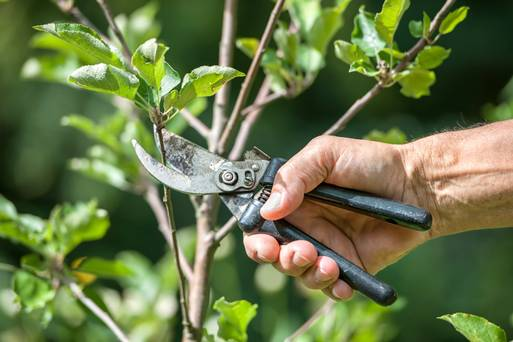

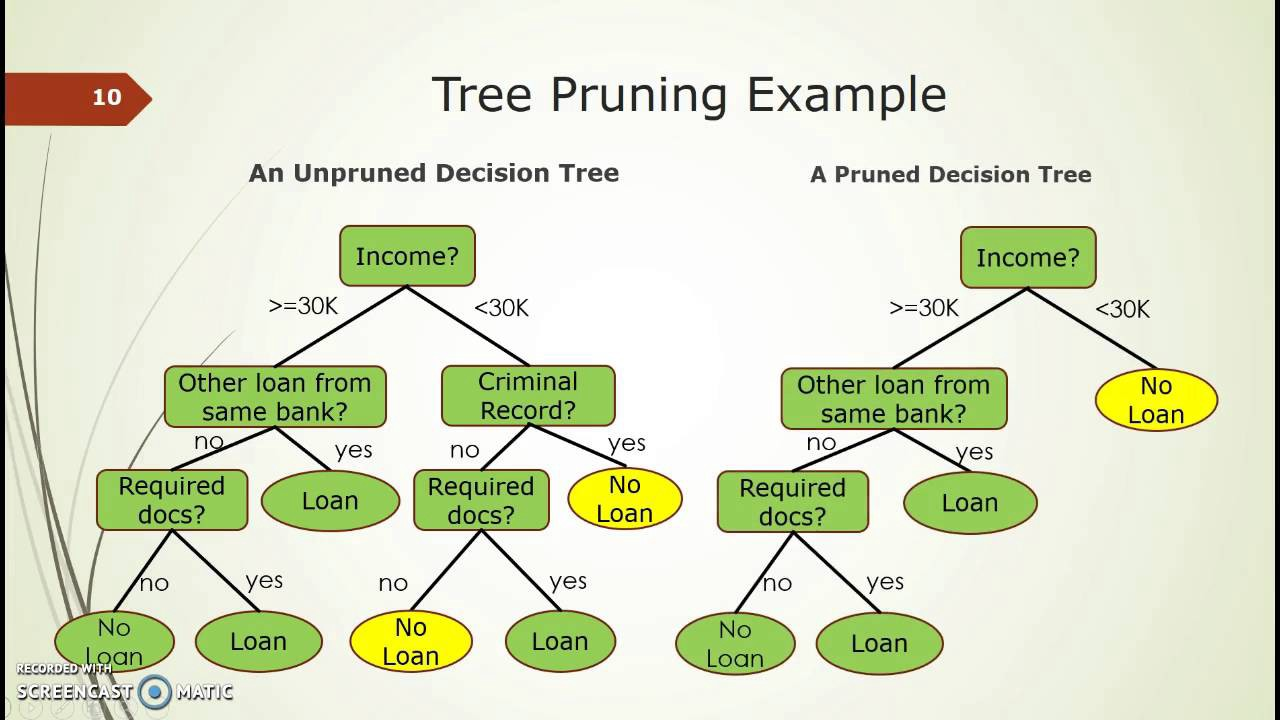

## Decision Tree Regressor

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [4]:
diabetes  = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [5]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.ht

In [6]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
X = diabetes.data
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [9]:
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


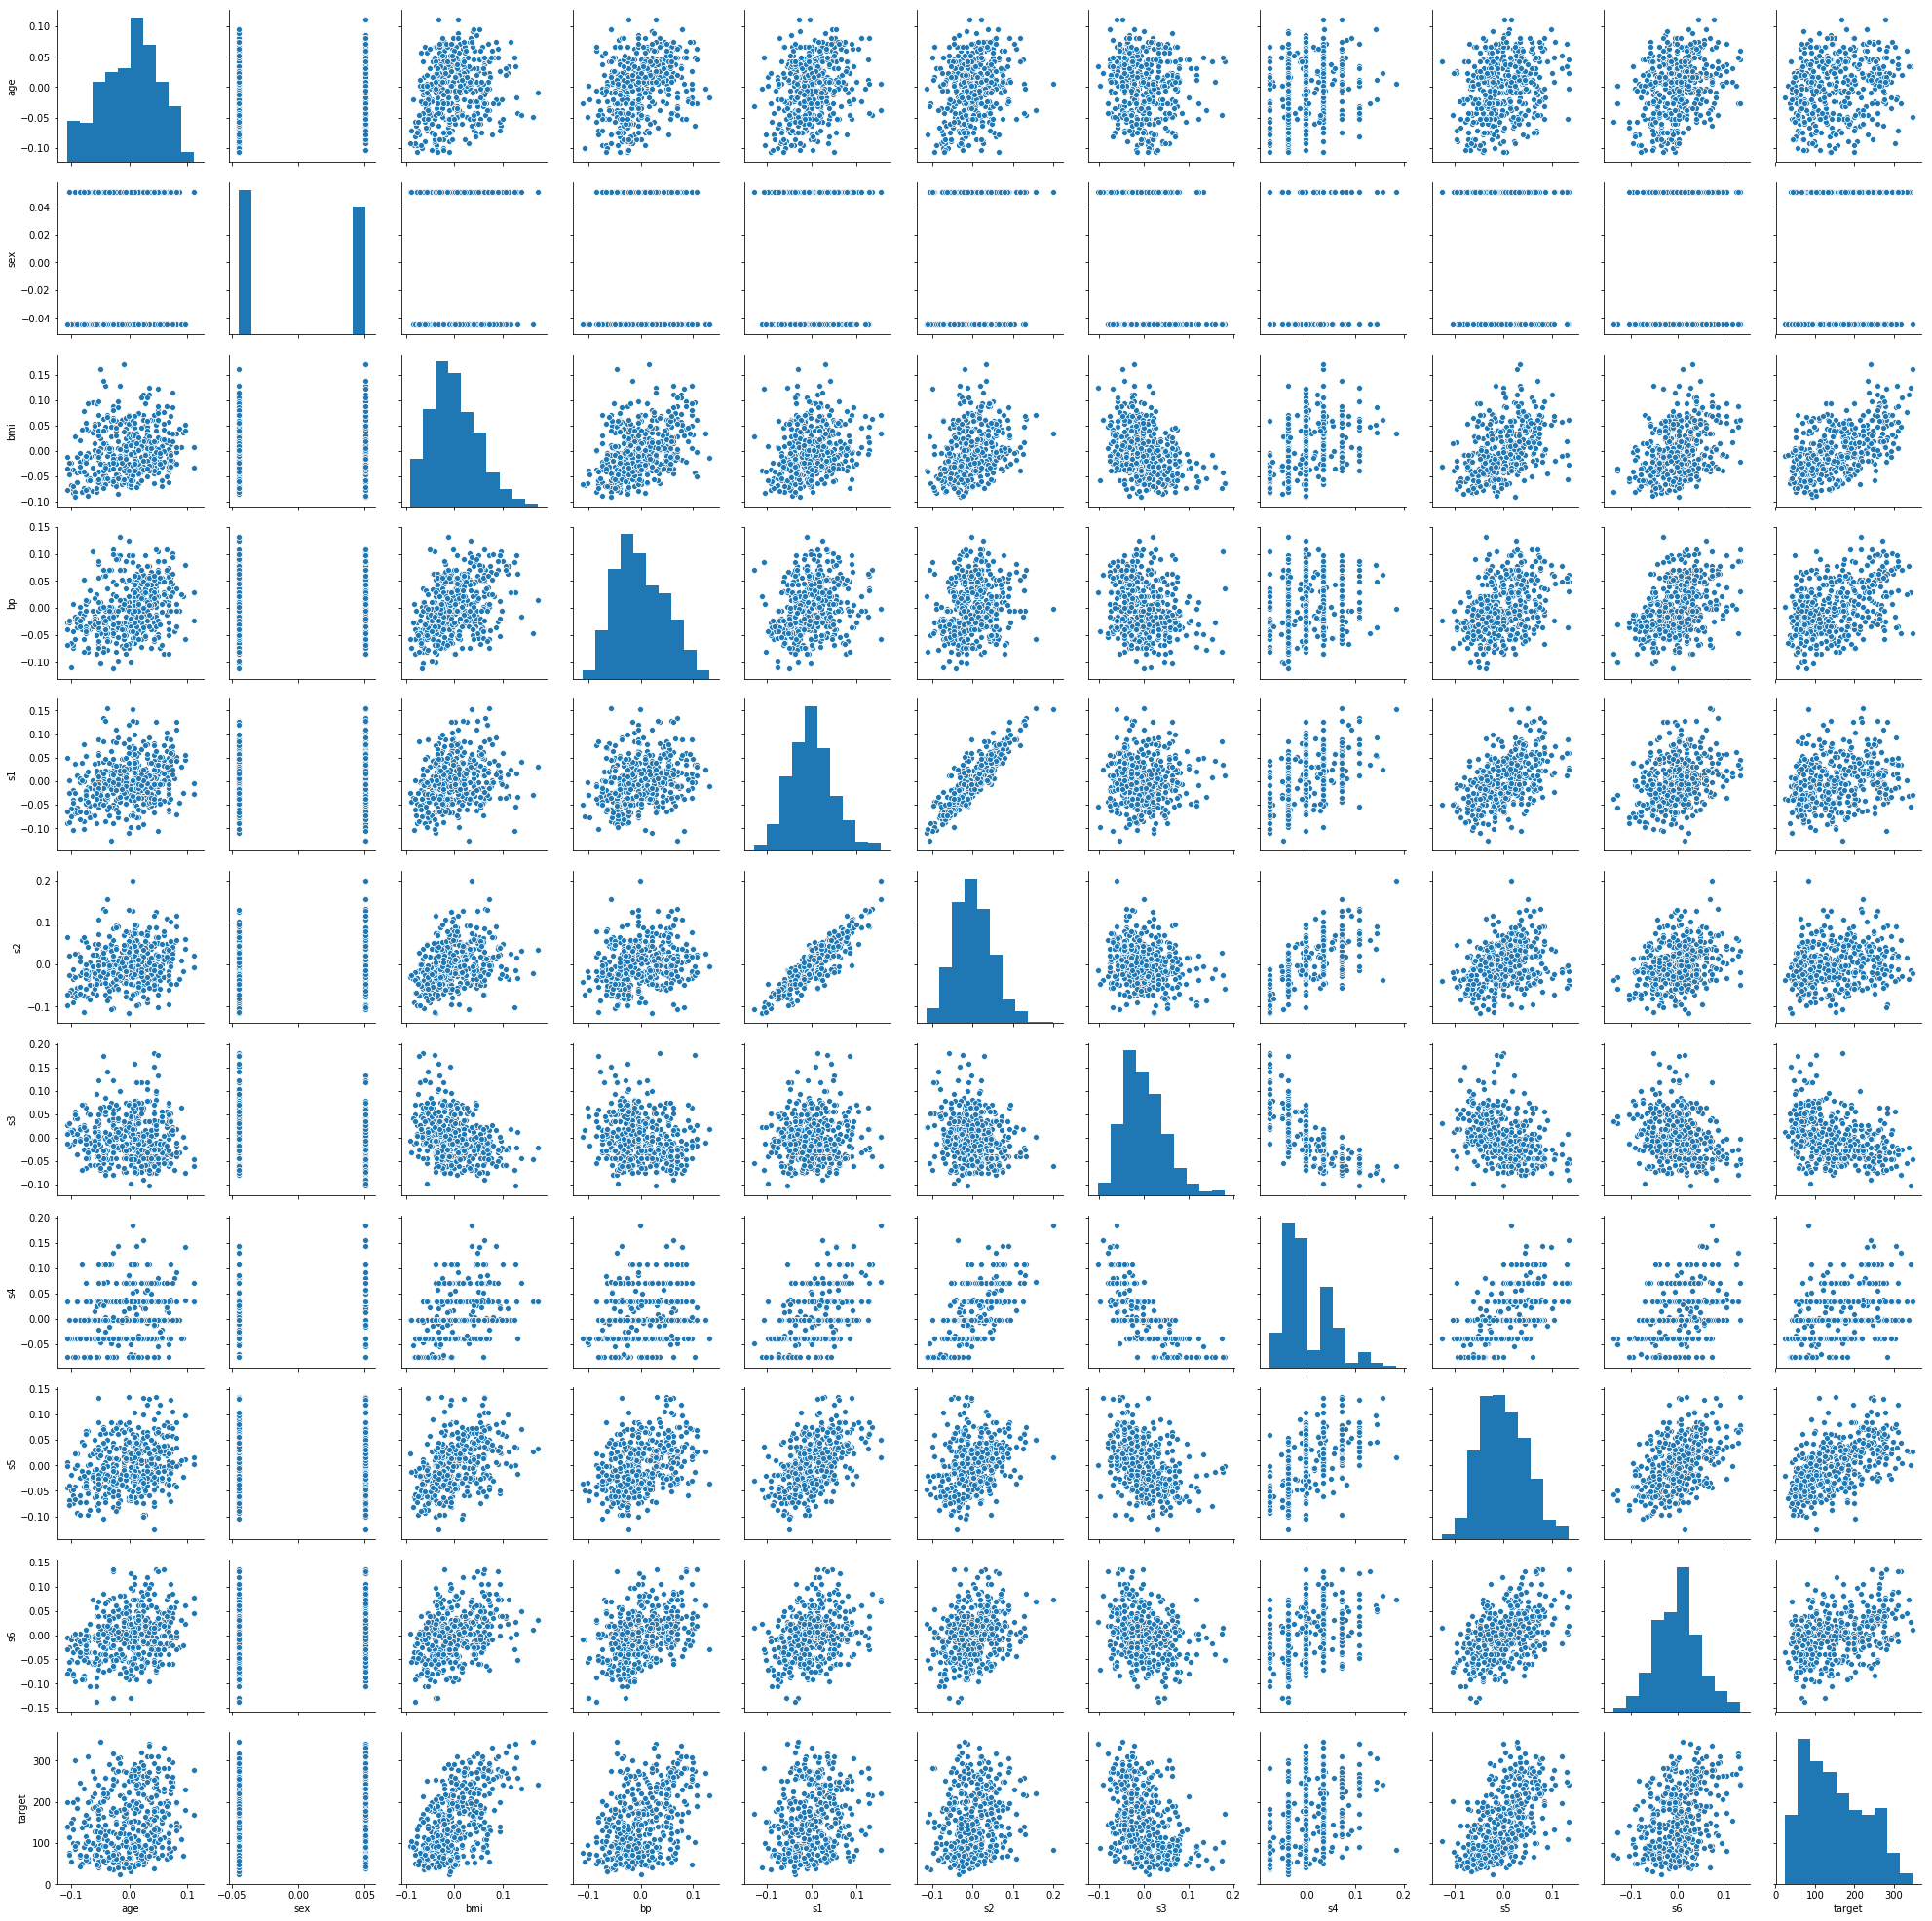

In [10]:
sns.pairplot(df)

## Decision Tree Regressor

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

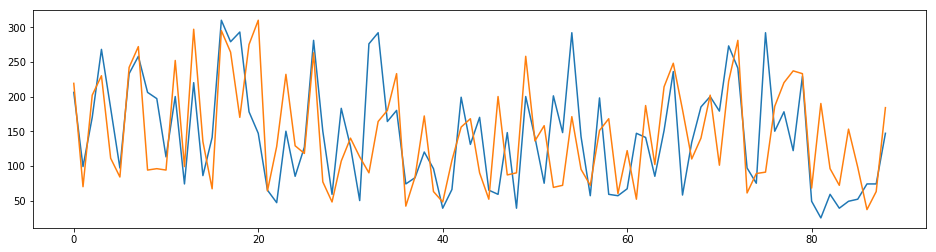

In [14]:
plt.figure(figsize=(16, 4))
plt.plot(y_pred)
plt.plot(y_test)

In [15]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

70.61829663921893

In [16]:
y_test.std()

72.78840394263774

## Decision Tree as a Classifier 

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
iris = datasets.load_iris()

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
X = iris.data
y = iris.target

In [22]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


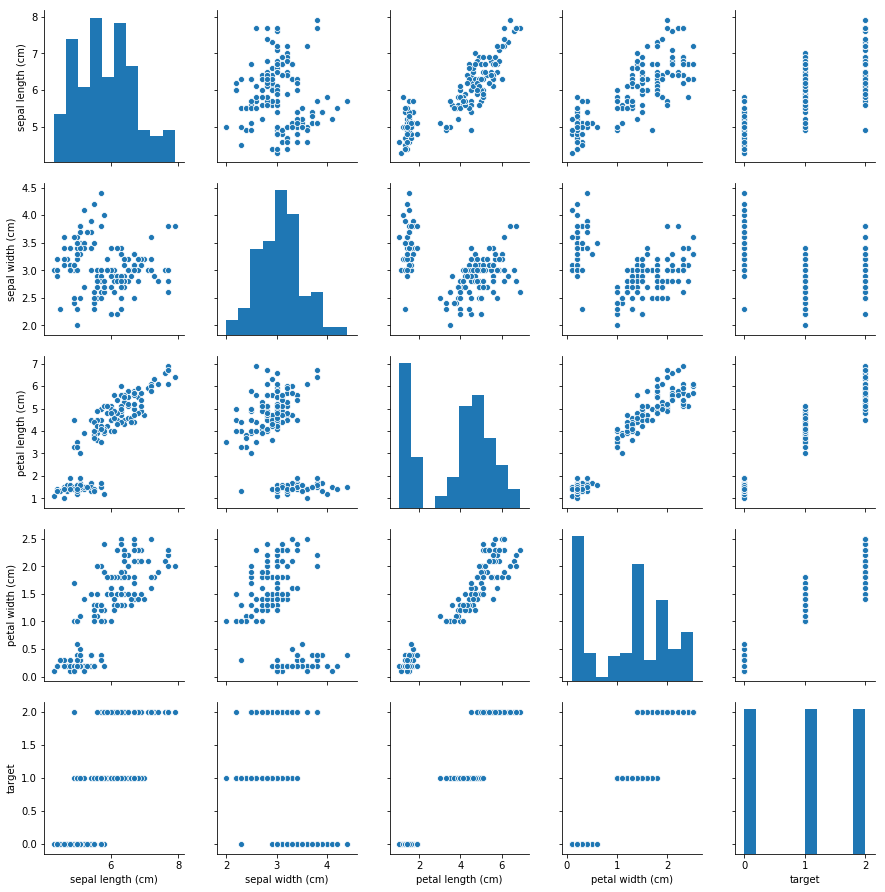

In [23]:
sns.pairplot(df)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2, stratify = y)

In [25]:
clf = DecisionTreeClassifier(criterion='gini', random_state=1)

In [26]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9666666666666667


Confusion Matrix


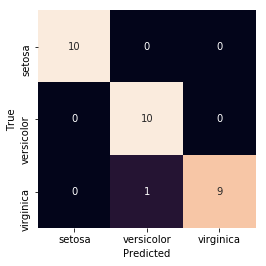

In [31]:
print('Confusion Matrix')
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot = True, fmt = 'd', cbar = False, xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
mat

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [32]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

